## Introduction

In this project, we extracted chocolate product data from the website **chocolate.co.uk**. Our goal was to gather and understand key product information by applying basic data processing techniques.

The project was completed in three main stages:

1. **Data Scraping** – Collecting product information from the website using Python tools.
2. **Data Cleaning** – Preparing the data for analysis by handling inconsistencies and formatting issues.
3. **Data Analysis** – Exploring the cleaned dataset to uncover insights about chocolate products.


## Introduction

In this project, we scraped chocolate product data from [chocolate.co.uk](https://www.chocolate.co.uk), cleaned the data, and performed simple analysis using Python.

We followed 3 main steps:
- Scraping Data
- Cleaning Data
- Data Analysis

## Scraping Chocolate Product Data

### Step 1: Web Scraping

In [1]:
#| ech
from bs4 import BeautifulSoup as bs4
import pandas as pd
import requests

def scrape_all_products(pages=3):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
    }

    all_products = []

    for page in range(1, pages + 1):
        url = f"https://www.chocolate.co.uk/collections/all?page={page}"

        try:
            send_request = requests.get(url, headers=headers)
            send_request.raise_for_status()
            soup = bs4(send_request.text, 'html.parser')
        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch page {page}: {e}")
            continue

        chocolate_cards = soup.find_all('div', class_='product-item__info')
        print(f"Found {len(chocolate_cards)} products on page {page}")
 
            price_tag = card.find('div', class_='product-item-meta__price-list-container')
            price_span = price_tag.find('span', class_='price') if price_tag else None
            price = price_span.text.strip() if price_span else "No Price"

            if product_url:
                product_page = requests.get(f'https://www.chocolate.co.uk{product_url}', headers=headers)
                product_soup = bs4(product_page.text, 'html.parser')
                ingredients = "No Ingredients"
                ingredients_div = product_soup.find('div', class_='metafield-rich_text_field')
                if ingredients_div:
                    for p in ingredients_div.find_all('p'):
                        if 'Ingredients:' in p.text:
                            ingredients = p.text.replace("Ingredients:", "").strip()
                            break
            else:
                ingredients = "No URL"

            full_url = f'https://www.chocolate.co.uk{product_url}'

            product = {
                "Name": Name,
                "Price": price,
                "Ingredients": ingredients,
                "URL": full_url
            }

            all_products.append(product)

    df = pd.DataFrame(all_products)
    print(f"\nScraped {len(df)} products in total.\n")
    print(df.head())
    return df

data = scrape_all_products(3)


Found 24 products on page 1
Found 24 products on page 2
Found 6 products on page 3

Scraped 54 products in total.

                                      Name                 Price  \
0  2.5kg Bulk 41% Milk Hot Chocolate Drops      Sale price£50.00   
1  2.5kg Bulk 61% Dark Hot Chocolate Drops      Sale price£50.00   
2             41% Milk Hot Chocolate Drops       Sale price£8.75   
3             61% Dark Hot Chocolate Drops       Sale price£8.75   
4                           Almost Perfect  Sale priceFrom £1.00   

                                         Ingredients  \
0  Milk Chocolate (41% Cocoa Minimum, Pure Cocoa ...   
1  Dark Chocolate (61% Cocoa Minimum, Pure Cocoa ...   
2  Milk Chocolate (41% Cocoa Minimum, Pure Cocoa ...   
3  Dark Chocolate (61% Cocoa Minimum, Pure Cocoa ...   
4                                     No Ingredients   

                                                 URL  
0  https://www.chocolate.co.uk/products/2-5kg-bul...  
1  https://www.chocolate.co.u

In [2]:
#data

## Cleaning and Formatting the Data

### Step 2: Data Cleaning

In [3]:
# Check for missing values
data.isna().sum()
# Check for duplicate values
#data.duplicated()

Name           0
Price          0
Ingredients    0
URL            0
dtype: int64

## Cleaning block

In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\Scrape_Chocolate_Products_Project\Data\Processed\New_chocolate_product_dataset.csv")

df['Price'] = df['Price'].str.replace('Sale price', '', regex=False)
df['Price'] = df['Price'].str.replace('From', '', regex=False)
df['Price'] = df['Price'].str.strip()
df['Price (£)'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float).astype(int)
df['Name'] = df['Name'].str.title()
df

,Name,Price,Ingredients,URL,Price (£)
0,2.5Kg Bulk 41% Milk Hot Chocolate Drops,£50.00,"Milk Chocolate (41% Cocoa Minimum, Pure Cocoa ...",https://www.chocolate.co.uk/products/2-5kg-bul...,50
1,2.5Kg Bulk 61% Dark Hot Chocolate Drops,£50.00,"Dark Chocolate (61% Cocoa Minimum, Pure Cocoa ...",https://www.chocolate.co.uk/products/2-5kg-of-...,50
2,41% Milk Hot Chocolate Drops,£8.75,"Milk Chocolate (41% Cocoa Minimum, Pure Cocoa ...",https://www.chocolate.co.uk/products/41-colomb...,8
3,61% Dark Hot Chocolate Drops,£8.75,"Dark Chocolate (61% Cocoa Minimum, Pure Cocoa ...",https://www.chocolate.co.uk/products/62-dark-h...,8
4,Almost Perfect,£1.00,No Ingredients,https://www.chocolate.co.uk/products/almost-pe...,1
5,Assorted Chocolate Malt Balls,£9.00,"White Chocolate (25%) (32% Cocoa Minimum, Pure...",https://www.chocolate.co.uk/products/assorted-...,9
6,Blonde Caramel,£5.00,"White Chocolate (35% Cocoa Minimum, Pure Cocoa...",https://www.chocolate.co.uk/products/blonde-ca...,5
7,Blonde Chocolate Honeycomb - Bag,£8.50,"White Chocolate (Min 35% Cocoa Min, Pure Cocoa...",https://www.chocolate.co.uk/products/blonde-ch...,8
8,Blonde Chocolate Malt Balls,£9.00,"White Chocolate (32% Cocoa Minimum, Pure Cocoa...",https://www.chocolate.co.uk/products/blonde-ch...,9
9,Blonde Chocolate Truffles,£19.95,"White Chocolate (32% Cocoa Minimum, Pure Cocoa...",https://www.chocolate.co.uk/products/blonde-ch...,19


## currency conversion

In [5]:
exchange_rate = 1.36
df['Price ($)'] = (df['Price (£)'] * exchange_rate).round(6)
df['Price ($)'] = df['Price ($)'].map(lambda x: ('%.4f' % x).rstrip('0').rstrip('.'))


## Column reordering

In [6]:
cols = list(df.columns)
cols.remove('Ingredients')
cols.append('Ingredients')
cols.remove('URL')
cols.append('URL')
df = df[cols]
df.drop(columns=['Price (â‚¬)', 'Ingredient', 'Count','Price'], inplace=True, errors='ignore')


C:\Users\user\AppData\Local\Temp\ipykernel_14620\3511967852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Price (â‚¬)', 'Ingredient', 'Count','Price'], inplace=True, errors='ignore')


## Final Cleaned Data

In [7]:
df_styled = df.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},  
    {'selector': 'td', 'props': [('text-align', 'center')]},
]).set_properties(
    subset=['Name'],
    **{'text-align': 'right'}
)

In [8]:
df_styled

,Name,Price (£),Price ($),Ingredients,URL
0,2.5Kg Bulk 41% Milk Hot Chocolate Drops,50,68,"Milk Chocolate (41% Cocoa Minimum, Pure Cocoa Butter, 19% Milk Solids) (100%): Sugar, Cocoa Butter, Milk Powder, Cocoa Beans, Emulsifier: Soya Lecithin, Vanilla Extract.",https://www.chocolate.co.uk/products/2-5kg-bulk-of-our-41-milk-hot-chocolate-drops
1,2.5Kg Bulk 61% Dark Hot Chocolate Drops,50,68,"Dark Chocolate (61% Cocoa Minimum, Pure Cocoa Butter) (100%): Cocoa Beans, Sugar, Cocoa Butter, Emulsifier: Soya Lecithin, Vanilla Extract.",https://www.chocolate.co.uk/products/2-5kg-of-our-best-selling-61-dark-hot-chocolate-drops
2,41% Milk Hot Chocolate Drops,8,10.88,"Milk Chocolate (41% Cocoa Minimum, Pure Cocoa Butter, 19% Milk Solids) (100%): Sugar, Cocoa Butter, Milk Powder, Cocoa Beans, Emulsifier: Soya Lecithin, Vanilla Extract.",https://www.chocolate.co.uk/products/41-colombian-milk-hot-chocolate-drops
3,61% Dark Hot Chocolate Drops,8,10.88,"Dark Chocolate (61% Cocoa Minimum, Pure Cocoa Butter) (100%): Cocoa Beans, Sugar, Cocoa Butter, Emulsifier: Soya Lecithin, Vanilla Extract.",https://www.chocolate.co.uk/products/62-dark-hot-chocolate
4,Almost Perfect,1,1.36,No Ingredients,https://www.chocolate.co.uk/products/almost-perfect
5,Assorted Chocolate Malt Balls,9,12.24,"White Chocolate (25%) (32% Cocoa Minimum, Pure Cocoa Butter) (65%): Cocoa Butter, Sugar, Whole Milk Powder, Skimmed Milk Powder, Whey Powder, Caramelised Sugar, Emulsifier: (Soya Lecithin), Natural Vanilla Flavouring, Salt. Milk Chocolate (41% Cocoa Minimum, Pure Cocoa Butter, 19% Milk Solids): Sugar, Cocoa Butter, Milk Powder, Cocoa Beans, Emulsifier: Sunflower Lecithin, Natural Vanilla Extract. Dark Chocolate (25%) (61% Cocoa Minimum, Pure Cocoa Butter): Cocoa Beans, Sugar, Cocoa Butter, Emulsifier: Sunflower Lecithin, Natural Vanilla Extract. Malt Ball Centres (25%): Corn Syrup, Sugar, Dairy Blend (Whey, Whey Protein Concentrate), Malt Powder (Malted Barley, Wheat, Milk, Hydrolyzed Wheat Gluten, Sodium Bicarbonate, Salt), Malted Barley, Soya Lecithin, Salt. Gum Arabic.",https://www.chocolate.co.uk/products/assorted-chocolate-malt-balls
6,Blonde Caramel,5,6.8,"White Chocolate (35% Cocoa Minimum, Pure Cocoa Butter): Cocoa Butter, Sugar, Whole Milk Powder, Skimmed Milk Powder, Whey Powder, Butter, Emulsifier: (Soya Lecithin), Natural Vanilla Flavouring.",https://www.chocolate.co.uk/products/blonde-caramel-chocolate-bar
7,Blonde Chocolate Honeycomb - Bag,8,10.88,"White Chocolate (Min 35% Cocoa Min, Pure Cocoa Butter, 24.7% Milk Solids): Cocoa Butter, Sugar, Whole Milk Powder, Dried Skimmed Milk, Whey, Butter, Emulsifier: (Soya Lecithin), Natural Vanilla Extract, Honeycomb (Sugar, Glucose Syrup, Bicarbonate of Soda, Honey).",https://www.chocolate.co.uk/products/blonde-chocolate-sea-salt-honeycomb
8,Blonde Chocolate Malt Balls,9,12.24,"White Chocolate (32% Cocoa Minimum, Pure Cocoa Butter) (65%): Cocoa Butter, Sugar, Whole Milk Powder, Skimmed Milk Powder, Whey Powder, Caramelised Sugar, Emulsifier: (Soya Lecithin), Natural Vanilla Flavouring, Salt. Malt Ball Centres (35%): Corn Syrup, Sugar, Dairy Blend (Whey, Whey Protein Concentrate), Malt Powder (Malted Barley, Wheat, Milk, Hydrolyzed Wheat Gluten, Sodium Bicarbonate, Salt), Malted Barley, Soya Lecithin, Salt.",https://www.chocolate.co.uk/products/blonde-chocolate-malt-balls
9,Blonde Chocolate Truffles,19,25.84,"White Chocolate (32% Cocoa Minimum, Pure Cocoa Butter, 24.7% Milk Solid) Sugar, Cocoa Butter, Whole Milk Powder, Dried Skimmed Milk, Whey, Butter, Emulsifier (Soya Lecithin), Natural Vanilla Extract, Cream, Glucose, Sorbitol, Sunflower Lecithin.",https://www.chocolate.co.uk/products/blonde-chocolate-truffles


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import seaborn as sns
import re

In [15]:
non_product_keywords = [
    'gift voucher', 'collection of', 'christmas cracker', 'hamper', 
    'voucher', 'best selling', 'assorted', 'celebration'
]

def is_non_product(name):
    name = str(name).lower()
    return any(keyword in name for keyword in non_product_keywords)

df_products = df[~df['Name'].apply(is_non_product)].copy()

## Visualizing Price Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_14620\1774128516.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



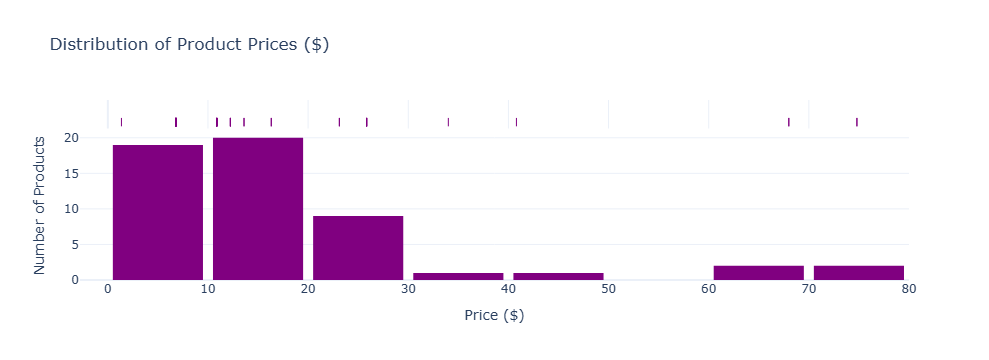

In [16]:
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

df_clean = df.dropna(subset=['Price ($)'])

fig = px.histogram(
    df_clean,
    x='Price ($)',
    nbins=10,
    title='Distribution of Product Prices ($)',
    labels={'Price ($)': 'Price ($)'},
    color_discrete_sequence=['purple'],
    marginal='rug'
)

fig.update_layout(
    xaxis_title='Price ($)',
    yaxis_title='Number of Products',
    bargap=0.1,
    template='plotly_white'
)

fig.show()


## Top 10 Most Expensive Chocolate Products ($)

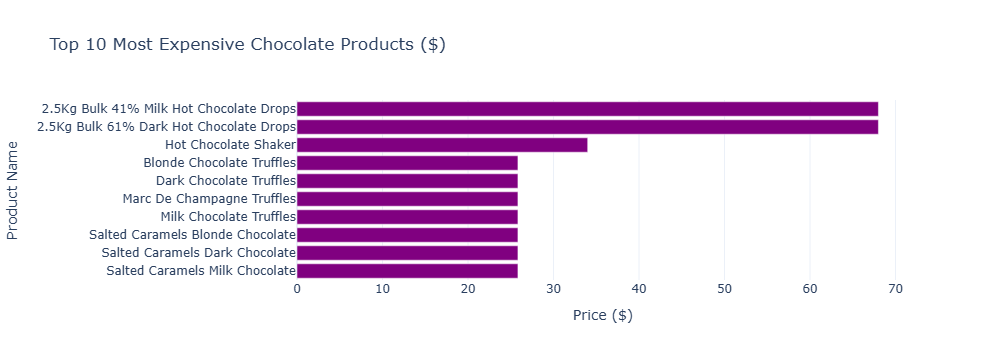

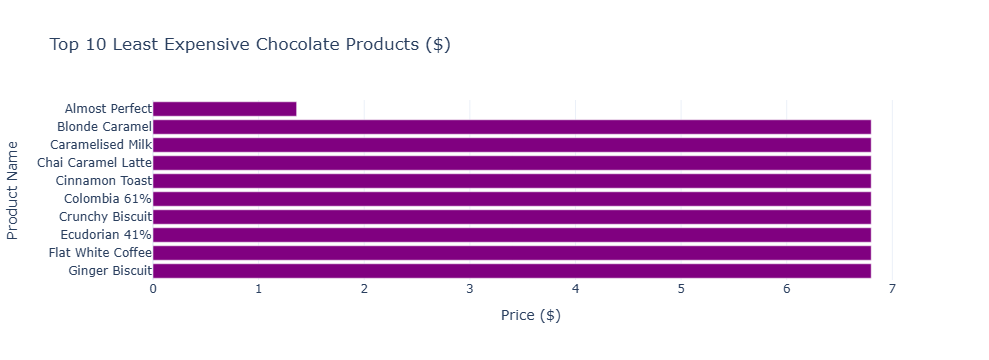

In [17]:

def show_top_bottom_plotly(view='Top 10'):

    df_products['Price ($)'] = df_products['Price ($)'].astype(str).str.replace('$', '').str.strip()
    df_products['Price ($)'] = pd.to_numeric(df_products['Price ($)'], errors='coerce')

 
    df_clean = df_products.dropna(subset=['Price ($)'])

 
    if view == 'Top 10':
        data = df_clean.nlargest(10, 'Price ($)').sort_values('Price ($)', ascending=False)
        title = 'Top 10 Most Expensive Chocolate Products ($)'
    else:
        data = df_clean.nsmallest(10, 'Price ($)').sort_values('Price ($)', ascending=True)
        title = 'Top 10 Least Expensive Chocolate Products ($)'


    fig = px.bar(
        data,
        x='Price ($)',
        y='Name',
        orientation='h',
        title=title,
        color_discrete_sequence=['purple'],
        labels={'Price ($)': 'Price ($)', 'Name': 'Product Name'}
    )

    fig.update_layout(
        yaxis=dict(autorange="reversed"),
        template='plotly_white'
    )

    fig.show()

show_top_bottom_plotly('Top 10')
show_top_bottom_plotly('Bottom 10')


## Price Impact of Top Ingredients

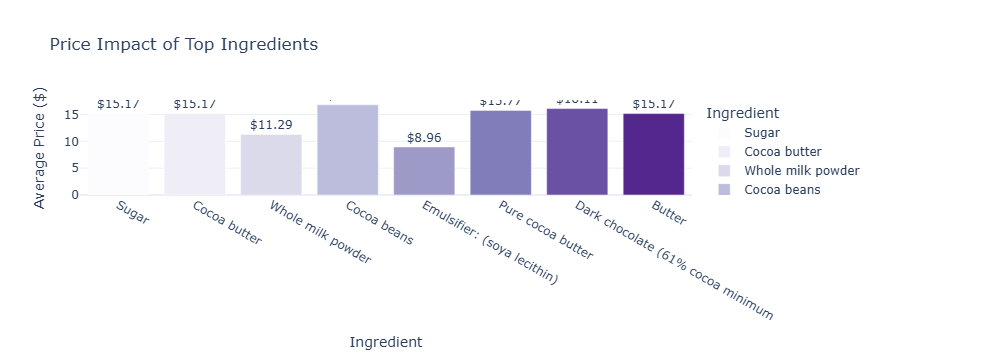

In [18]:
all_ingredients = df_products['Ingredients'].dropna().astype(str).str.lower().str.split(', ')
flat_ingredients = [ingredient.strip() for sublist in all_ingredients for ingredient in sublist]

ingredient_counts = Counter(flat_ingredients)
top_20_ingredients = [item[0] for item in ingredient_counts.most_common(20)]
top_5_ingredients = top_20_ingredients[:8]  # Top 8

price_impact_data = []
for ingredient in top_5_ingredients:
    contains = df_products['Ingredients'].astype(str).str.lower().str.contains(ingredient, na=False, regex=False)
    avg_price_with = pd.to_numeric(df_products.loc[contains, 'Price ($)'], errors='coerce').mean()
    
    price_impact_data.append({
        'Ingredient': ingredient.capitalize(),
        'Average Price With ($)': avg_price_with
    })

impact_df = pd.DataFrame(price_impact_data)

fig = px.bar(
    impact_df,
    x='Ingredient',
    y='Average Price With ($)',
    text='Average Price With ($)',
    title='Price Impact of Top Ingredients',
    color='Ingredient',
    color_discrete_sequence=px.colors.sequential.Purples
)

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Average Price ($)',
    xaxis_title='Ingredient',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    template='plotly_white'
)

fig.show()


## Top 10 Ingredients by Frequency

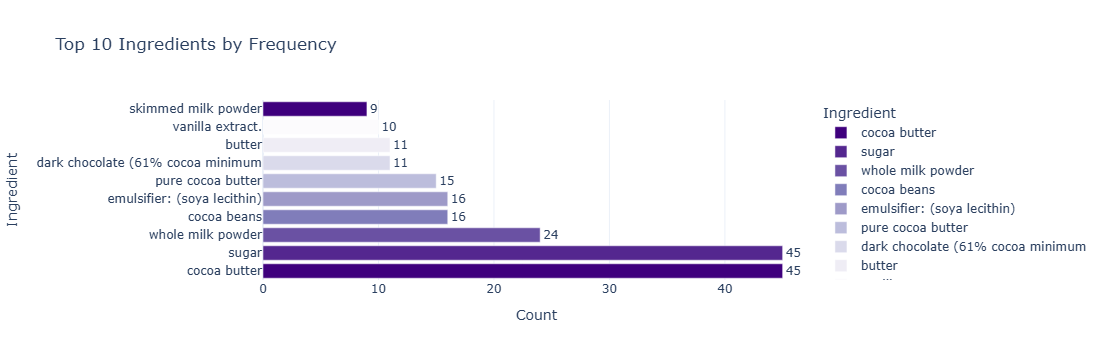

In [19]:

df_with_ingredients = df_products[
    df_products['Ingredients'].notna() &
    (df_products['Ingredients'].str.strip() != '')
]

ingredient_list = []
for row in df_with_ingredients['Ingredients']:
    for ingredient in str(row).split(','):
        ingredient_list.append(ingredient.strip().lower())

ingredient_counts = Counter(ingredient_list)

top_ingredients_df = pd.DataFrame(
    ingredient_counts.most_common(10),
    columns=['Ingredient', 'Count']
)

fig = px.bar(
    top_ingredients_df,
    x='Count',
    y='Ingredient',
    orientation='h',
    title='Top 10 Ingredients by Frequency',
    text='Count',
    color='Ingredient',
    color_discrete_sequence=px.colors.sequential.Purples[::-1]
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Ingredient',
    yaxis=dict(autorange='reversed'),
    template='plotly_white'
)

fig.show()


## Most Expensive Products: Cocoa vs Milk Composition

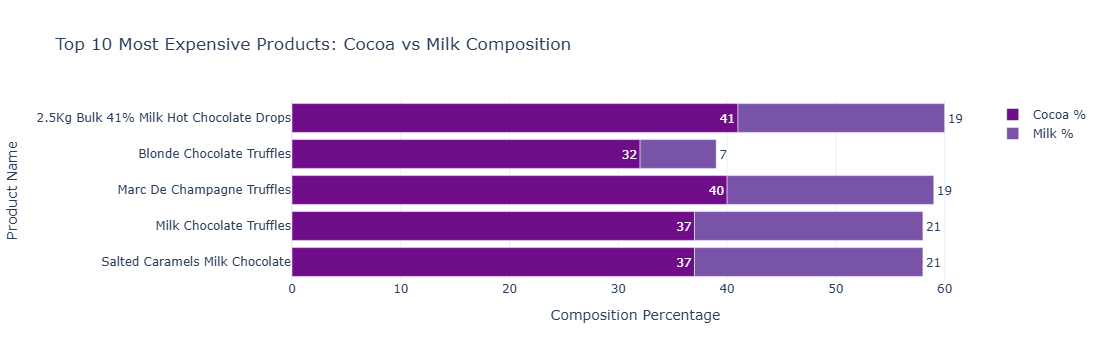

In [20]:
def extract_cocoa_percent(text):
    match = re.search(r'(\d+)% Cocoa', str(text))
    return int(match.group(1)) if match else None

def extract_milk_percent(text):
    match = re.search(r'(\d+)% Milk', str(text))
    return int(match.group(1)) if match else None

df_products['Cocoa %'] = df_products['Ingredients'].apply(extract_cocoa_percent)
df_products['Milk %'] = df_products['Ingredients'].apply(extract_milk_percent)

top_products = df_products.nlargest(10, 'Price ($)').copy()

top_products = top_products.dropna(subset=['Cocoa %', 'Milk %'])

melted = pd.melt(
    top_products,
    id_vars='Name',
    value_vars=['Cocoa %', 'Milk %'],
    var_name='Component',
    value_name='Percentage'
)

fig = px.bar(
    melted,
    x='Percentage',
    y='Name',
    color='Component',
    orientation='h',
    title='Top 10 Most Expensive Products: Cocoa vs Milk Composition',
    color_discrete_map={
        'Cocoa %': '#6F0C8A',
        'Milk %': '#7853A8'
    },
    text='Percentage'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='Composition Percentage',
    yaxis_title='Product Name',
    template='plotly_white',
    legend_title=''
)

fig.show()


## Cocoa %, Milk %, and Price Comparison

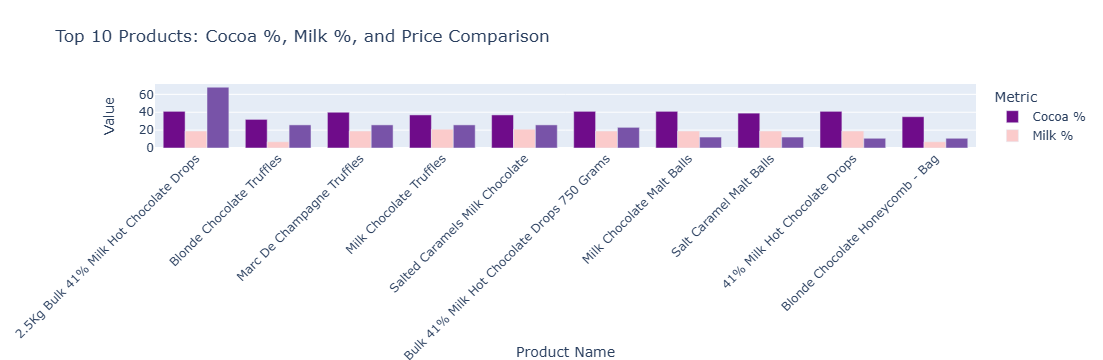

In [21]:
plot_data = df_products[['Name', 'Cocoa %', 'Milk %', 'Price ($)']].dropna()
plot_data = plot_data.nlargest(10, 'Price ($)')

df_long = plot_data.melt(id_vars='Name', 
                         value_vars=['Cocoa %', 'Milk %', 'Price ($)'],
                         var_name='Metric', value_name='Value')

color_map = {
    'Cocoa %': '#6F0C8A',
    'Milk %': '#FBCBCB',  
    'Price ($)': '#7853A8' 
}

fig = px.bar(df_long, 
             x='Name', y='Value', color='Metric', barmode='group',
             color_discrete_map=color_map,
             title='Top 10 Products: Cocoa %, Milk %, and Price Comparison',
             labels={'Name': 'Product Name', 'Value': 'Value'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()


## Top Common Ingredients

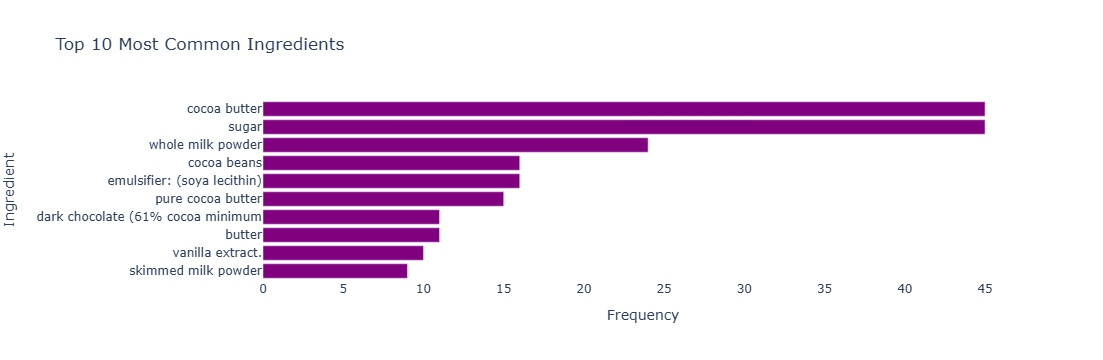

In [22]:
ingredient_series = pd.Series(ingredient_counts).sort_values(ascending=False)
top_ingredients = ingredient_series.head(10)

df_top = top_ingredients.reset_index()
df_top.columns = ['Ingredient', 'Frequency']

fig = px.bar(df_top, 
             x='Frequency', y='Ingredient', 
             orientation='h', 
             title='Top 10 Most Common Ingredients',
             labels={'Frequency': 'Frequency', 'Ingredient': 'Ingredient'},
             color_discrete_sequence=['purple'])

fig.update_layout(yaxis=dict(autorange='reversed'),
                  xaxis=dict(showgrid=True),
                  plot_bgcolor='white')

fig.show()


## Products by Category or Flavor

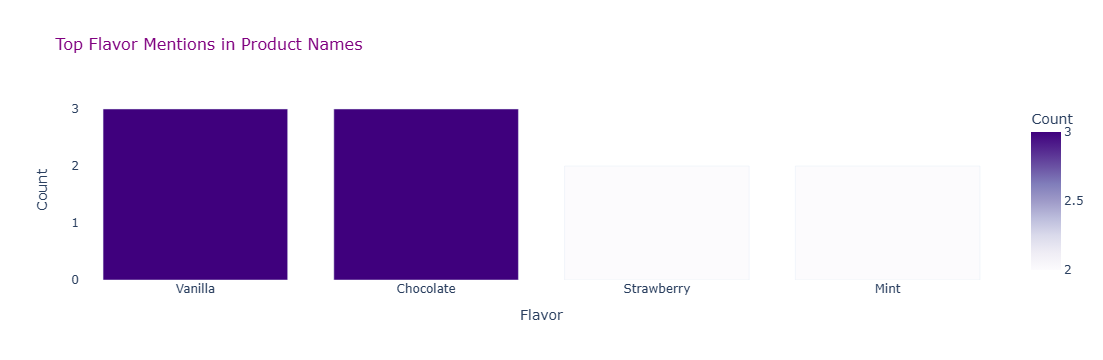

In [26]:
from collections import Counter
flavors = [
    'Vanilla', 'Chocolate', 'Strawberry', 'Vanilla', 'Chocolate', 
    'Chocolate', 'Mint', 'Vanilla', 'Mint', 'Strawberry'
]


flavor_counts = Counter(flavors)

df_flavors = pd.DataFrame({
    'Flavor': list(flavor_counts.keys()),
    'Count': list(flavor_counts.values())
})

df_flavors = df_flavors.sort_values('Count', ascending=False)

fig = px.bar(df_flavors, 
             x='Flavor', y='Count',
             title='Top Flavor Mentions in Product Names',
             labels={'Count': 'Count', 'Flavor': 'Flavor'},
             color='Count',
             color_continuous_scale='Purples')

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Flavor',
    yaxis_title='Count',
    yaxis=dict(showgrid=True),
    title_font=dict(size=16, color='purple')
)

fig.show()


## Missing Ingredients

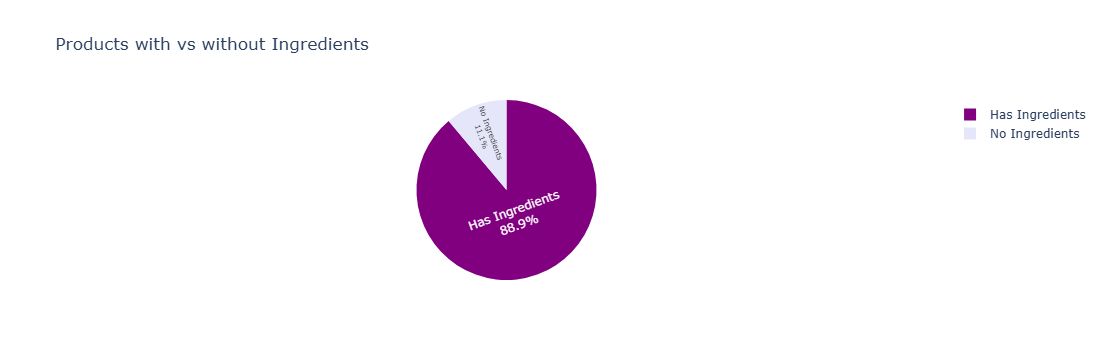

In [24]:
import plotly.express as px
import pandas as pd

has_ingredients = df['Ingredients'].apply(lambda x: x != 'No Ingredients').sum()
no_ingredients = len(df) - has_ingredients

pie_data = pd.DataFrame({
    'Status': ['Has Ingredients', 'No Ingredients'],
    'Count': [has_ingredients, no_ingredients]
})

fig = px.pie(pie_data, values='Count', names='Status',
             color='Status',
             color_discrete_map={'Has Ingredients': 'purple', 'No Ingredients': 'lavender'},
             title='Products with vs without Ingredients')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


## Top 10 Expensive Chocolates

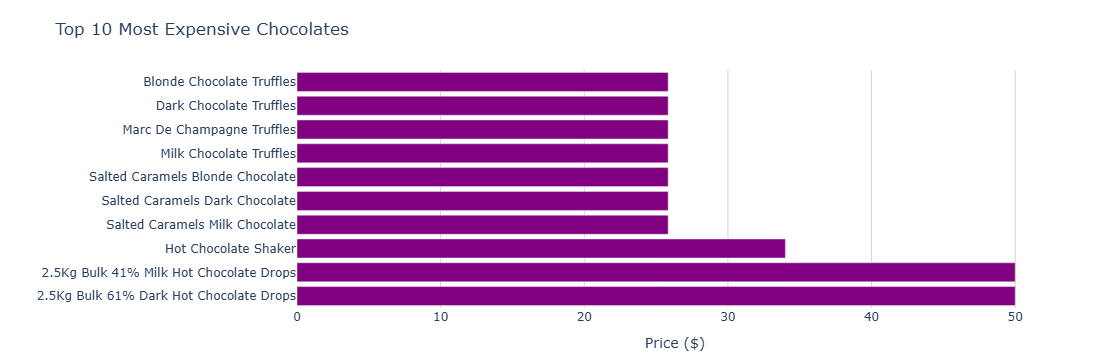

In [25]:
import plotly.express as px
import pandas as pd

data = {
    'Name': [
        '2.5Kg Bulk 41% Milk Hot Chocolate Drops',
        '2.5Kg Bulk 61% Dark Hot Chocolate Drops',
        'Hot Chocolate Shaker',
        'Blonde Chocolate Truffles',
        'Dark Chocolate Truffles',
        'Marc De Champagne Truffles',
        'Milk Chocolate Truffles',
        'Salted Caramels Blonde Chocolate',
        'Salted Caramels Dark Chocolate',
        'Salted Caramels Milk Chocolate'
    ],
    'Price ($)': [50.00, 50.00, 34.00, 25.84, 25.84, 25.84, 25.84, 25.84, 25.84, 25.84]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Price ($)', ascending=True)  # For horizontal barplot with lowest on bottom

fig = px.bar(df_sorted, 
             x='Price ($)', 
             y='Name',
             orientation='h',
             color_discrete_sequence=['#800080'],
             title='Top 10 Most Expensive Chocolates',
             labels={'Price ($)': 'Price ($)', 'Name': ''},
             hover_data={'Price ($)': ':.2f'})

fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(autorange='reversed'),  # to keep highest price on top
    plot_bgcolor='white',
    margin=dict(l=150, r=50, t=70, b=50)
)

fig.show()


# THANK YOU !!!
#### Presented by:
- Cynthia  
- Jane  
- Judid

#### Date:12025-06-06